In [61]:
from PIL import Image
from pathlib import Path
from anomalib.data import MVTec
from anomalib.engine import Engine
from anomalib.models import Patchcore
from anomalib.utils.post_processing import superimpose_anomaly_map
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Dataset MVTec AD
https://www.mvtec.com/company/research/datasets/mvtec-ad

~~~python
class MVTec(
    root: Path | str = "./datasets/MVTec",
    category: str = "bottle",
    train_batch_size: int = 32,
    eval_batch_size: int = 32,
    num_workers: int = 8,
    train_augmentations: Transform | None = None,
    val_augmentations: Transform | None = None,
    test_augmentations: Transform | None = None,
    augmentations: Transform | None = None,
    test_split_mode: TestSplitMode | str = TestSplitMode.FROM_DIR,
    test_split_ratio: float = 0.2,
    val_split_mode: ValSplitMode | str = ValSplitMode.SAME_AS_TEST,
    val_split_ratio: float = 0.5,
    seed: int | None = None
)
~~~

In [3]:
datamodule = MVTec()

### Model Patchcore
Paper: https://arxiv.org/abs/2106.08265
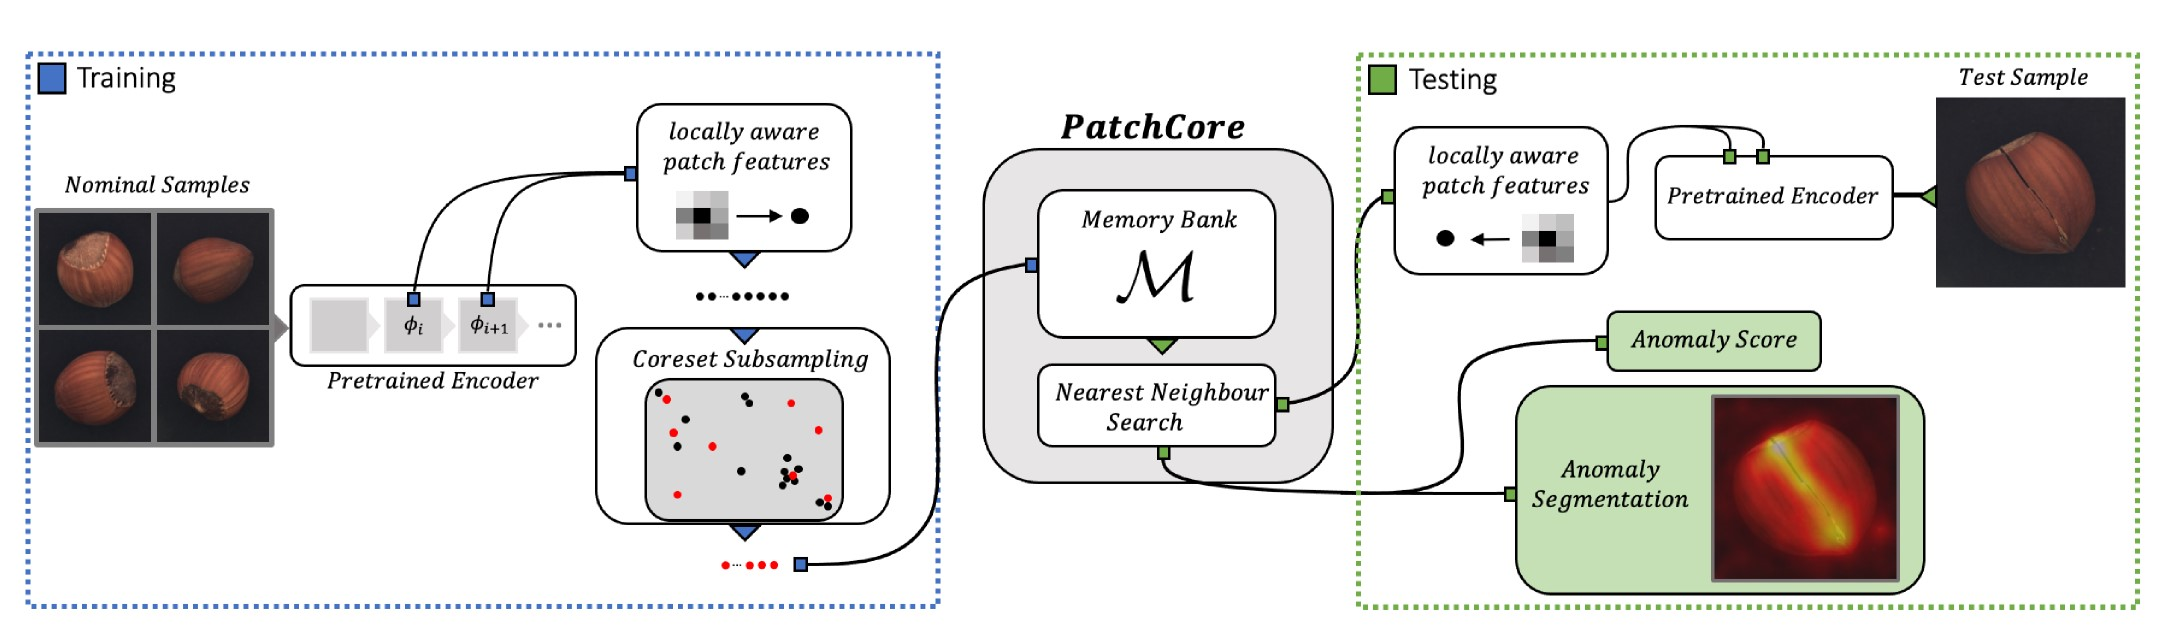

##### Docs: https://anomalib.readthedocs.io/en/latest/markdown/guides/reference/models/image/patchcore.html
~~~py
class Patchcore(
    backbone: str = "wide_resnet50_2",
    layers: Sequence[str] = ("layer2", "layer3"),
    pre_trained: bool = True,
    coreset_sampling_ratio: float = 0.1,
    num_neighbors: int = 9,
    pre_processor: PreProcessor | bool = True,
    post_processor: PostProcessor | bool = True,
    evaluator: Evaluator | bool = True,
    visualizer: Visualizer | bool = True
)

In [60]:
model = Patchcore(
    backbone="wide_resnet50_2",
    layers=["layer2", "layer3"],
    coreset_sampling_ratio=0.1
)

INFO:anomalib.models.components.base.anomalib_module:Initializing Patchcore model.
INFO:timm.models._builder:Loading pretrained weights from Hugging Face hub (timm/wide_resnet50_2.racm_in1k)
INFO:timm.models._hub:[timm/wide_resnet50_2.racm_in1k] Safe alternative available for 'pytorch_model.bin' (as 'model.safetensors'). Loading weights using safetensors.
INFO:timm.models._builder:Missing keys (fc.weight, fc.bias) discovered while loading pretrained weights. This is expected if model is being adapted.


### Training

In [5]:
engine = Engine()
engine.fit(datamodule=datamodule, model=model)

INFO:lightning_fabric.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:lightning_fabric.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:lightning_fabric.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:lightning_fabric.utilities.rank_zero:You are using a CUDA device ('NVIDIA GeForce RTX 3070') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
INFO:anomalib.data.datamodules.image.mvtec:Found the dataset.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/dawdab/.pyenv/versions/anomalib_playground/lib/python3.12/site-packages/lightning/pytorch/core/optimizer.py:183: `LightningModule.configure_optimizers` returned `None`, this fit will run with no optimizer

  | Name           | Type           

Training: |          | 0/? [00:00<?, ?it/s]

/usr/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=33759) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/usr/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=33759) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/usr/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=33759) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/usr/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=33759) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/usr/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=33759) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/usr/lib/python3.12/multiprocessing/popen_for

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:anomalib.models.image.patchcore.lightning_model:Aggregating the embedding extracted from the training set.
INFO:anomalib.models.image.patchcore.lightning_model:Applying core-set subsampling to get the embedding.























































































































































































































































































































































































































































































































Selecting Coreset Indices.: 100%|██████████| 16385/16385 [00:51<00:00, 317.26it/s]
INFO:lightning_fabric.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.
INFO:anomalib.callbacks.timer:Training took 181.25 seconds


In [42]:
predictions = engine.predict(datamodule=datamodule, model=model)

INFO:lightning_fabric.utilities.rank_zero:The following callbacks returned in `LightningModule.configure_callbacks` will override existing callbacks passed to Trainer: Evaluator, ImageVisualizer, OneClassPostProcessor, PreProcessor
INFO:anomalib.data.datamodules.image.mvtec:Found the dataset.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=33759) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/usr/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=33759) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/usr/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=33759) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/usr/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid

Predicting: |          | 0/? [00:00<?, ?it/s]

In [43]:
results = []
for batch in predictions:
    batch_image_paths = batch.image_path
    batch_pred_scores = batch.pred_score
    batch_pred_labels = batch.pred_label
    batch_gt_labels = batch.gt_label

    for img_path, score, pred_label, gt_label in zip(batch_image_paths, 
                                                     batch_pred_scores, 
                                                     batch_pred_labels, 
                                                     batch_gt_labels):
        results.append({
            "Image": Path(img_path).relative_to(Path.cwd()),
            "Anomaly Score": round(float(score), 4),
            "Prediction": "Anomalous" if pred_label else "Normal",
            "Ground Truth": "Anomalous" if gt_label else "Normal"
        })

df_results = pd.DataFrame(results)
display(df_results)



,Image,Anomaly Score,Prediction,Ground Truth
0,datasets/MVTec/bottle/test/broken_large/000.png,0.9225,Anomalous,Anomalous
1,datasets/MVTec/bottle/test/broken_large/001.png,0.8874,Anomalous,Anomalous
2,datasets/MVTec/bottle/test/broken_large/002.png,0.8793,Anomalous,Anomalous
3,datasets/MVTec/bottle/test/broken_large/003.png,0.9687,Anomalous,Anomalous
4,datasets/MVTec/bottle/test/broken_large/004.png,0.9788,Anomalous,Anomalous
...,...,...,...,...
78,datasets/MVTec/bottle/test/good/015.png,0.2709,Normal,Normal
79,datasets/MVTec/bottle/test/good/016.png,0.2600,Normal,Normal
80,datasets/MVTec/bottle/test/good/017.png,0.2071,Normal,Normal
81,datasets/MVTec/bottle/test/good/018.png,0.1981,Normal,Normal


### Visualization

In [51]:
prediction = predictions[0]
print(
    f"Image Shape: {prediction.image.shape},\n"
    f"Anomaly Map Shape: {prediction.anomaly_map.shape}, \n"
    f"Predicted Mask Shape: {prediction.pred_mask.shape}",
)

Image Shape: torch.Size([32, 3, 224, 224]),
Anomaly Map Shape: torch.Size([32, 224, 224]), 
Predicted Mask Shape: torch.Size([32, 224, 224])


In [ ]:
image_path = prediction.image_path[0]
image_size = prediction.image.shape[-2:]
image = np.array(Image.open(image_path).resize(image_size))

torch.Size([224, 224])


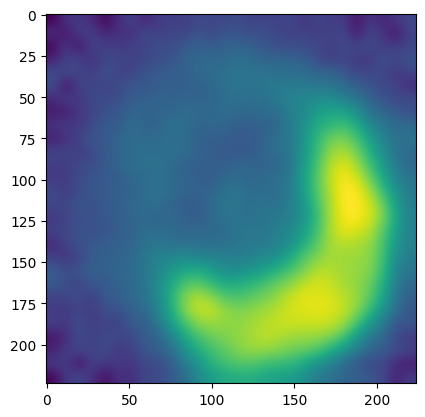

In [66]:
anomaly_map = prediction.anomaly_map[0]
anomaly_map = anomaly_map.cpu().numpy().squeeze()
plt.imshow(anomaly_map)

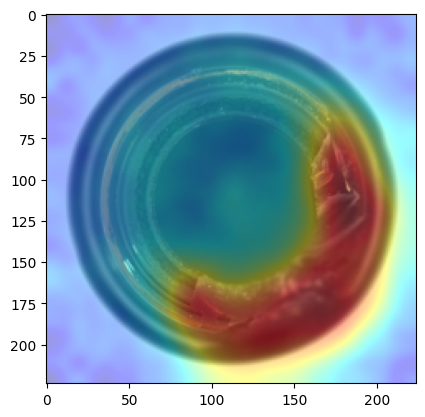

In [56]:
heat_map = superimpose_anomaly_map(anomaly_map=anomaly_map, image=image, normalize=True)
plt.imshow(heat_map)

In [57]:
pred_score = prediction.pred_score[0]
pred_labels = prediction.pred_label[0]
print(pred_score, pred_labels)

tensor(0.9225) tensor(True)


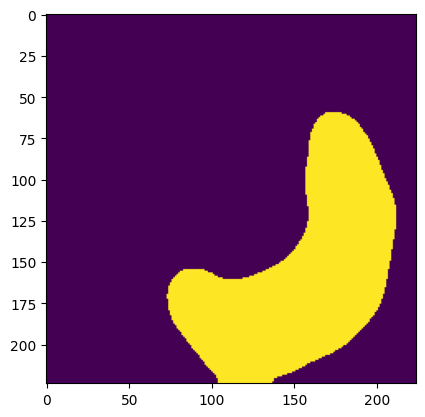

In [58]:
pred_masks = prediction.pred_mask[0].squeeze().cpu().numpy()
plt.imshow(pred_masks)